# Project - Perceptron
- Try a Perceptron model with more dimensions

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/weather.csv**
- HINT: Use **parse_dates=True** and **index_col=0**

In [2]:
data = pd.read_csv('files/weather.csv', parse_dates=True, index_col=0)

In [3]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


### Step 3: Investigate data
- Look for missing data points
- You can do that by applying **isna()** and **sum()**, which will give a summary of rows missing data for each column.
    - Resource: [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)
    - Resource: [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [4]:
data.isna().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [5]:
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

### Step 4: Remove 'dirty' columns 
- Make a choice and remove columns with too many entries with NaN.
- Say, take all columns with more than 100 rows.
- Also, you can remove rows with non-numeric values (remember to keep **RainTomorrow**)
- To remove rows use [drop(columns, axis=1)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [6]:
dataset = data.drop(['WindGustDir', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)

In [7]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,17.0,20.0,92.0,84.0,1017.6,1017.4,20.7,20.9,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,9.0,13.0,83.0,73.0,1017.9,1016.4,22.4,24.8,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,17.0,2.0,88.0,86.0,1016.7,1015.6,23.5,23.0,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,22.0,20.0,83.0,90.0,1014.2,1011.8,21.4,20.9,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,11.0,6.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1.6,Yes


### Step 5: Deal with remaining missing data
- A simple choice is to simply remove rows with missing data
- Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [8]:
dataset_clean = dataset.dropna()

In [9]:
len(dataset), len(dataset_clean)

(3337, 3187)

### Step 6: Create training and test datasets
- Define dataset **X** to consist of all data except **'RainTomorrow'**.
    - Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- Define dataset **y** to be datset cosisting of **'RainTomorrow'**.
- Divide into **X_train, X_test, y_train, y_test** with **train_test_split**
    - You can use **random_state=42** (or any other number) if you want to reproduce results.

In [10]:
X = dataset_clean[dataset_clean.columns[:-1]]
y = dataset_clean['RainTomorrow']
y = np.array([0 if value == 'No' else 1 for value in y])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Step 7: Train and test the model
- Create classifier with **Perceptron**
    - You can use **random_state=0** to be able to reproduce
- Fit the model with training data **(X_train, y_train**)
- Predict data from **X_test** (use predict) and assign to **y_pred**.
- Evalute score by using **metrics.accuracy_score(y_test, y_pred)**.
- You can redo with different choice of columns

In [12]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.835633626097867

In [13]:
sum(y == 0) / len(y)

0.7458424850957013

### Step 8 (Optional): Plot the result
- Use Matplotlib.pyplot (**plt**) with **subplots** to create a figure and axes (**fig, ax**)
- Predict all the datapoints in **X**.
- Make a scatter plot with all datapoints in **X** with color by the predictions made.
    - You might want to use **alpha=0.25** in your plot as argument.

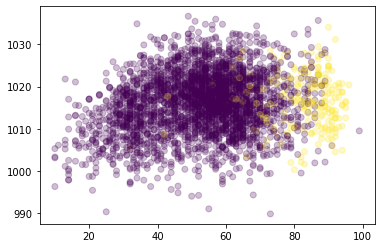

In [14]:
fig, ax = plt.subplots()
y_pred = clf.predict(X)
ax.scatter(x=X['Humidity3pm'], y=X['Pressure3pm'], c=y_pred, alpha=.25)